In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Assignment-gene_data.csv')
df = pd.DataFrame(df)
df.head()

/home/iiser/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,symbol,S1,S2,S3,S4,S5,S6,S7,S8,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,1,Zzz3,253.401685,402.8508776,230.957463,688.486264,358.067836,344.962350,441.155001,301.149694,...,507.882774,465.081486,415.478767,297.061149,488.848114,367.912141,307.199908,347.802509,411.227261,283.709694
1,2,Zzef1,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
2,3,Zyx,40.578958,49.23516006,59.472005,46.212152,61.969671,55.732843,53.819870,54.315691,...,33.512262,36.751853,36.952457,35.718610,27.346198,32.647887,42.006833,32.324596,41.426033,32.754971
3,4,Zyg11b,26.373102,35.00190057,32.389728,34.932372,35.192365,33.858459,27.948378,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
4,5,Zyg11a,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797


In [3]:
df2 = pd.read_csv('Assignment-Meta_data sheet.csv')
df2 = pd.DataFrame(df2)
df2.head()

,sIdx,Time,Unit
0,S1,9,Hours
1,S2,9,Hours
2,S3,9,Hours
3,S4,7,Hours
4,S5,7,Hours


In [4]:
#X = df.iloc[0:,2:].values
y = df.iloc[:,1].values

In [5]:
df1 = df.where(df.applymap(lambda x: str(x).isalnum() is False))
df1 = df1.fillna(0.0)
X = df1.iloc[0:,2:].values
X = X.astype(float)

In [6]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# 1 - Eigendecomposition - Computing Eigenvectors and Eigenvalues

## Covariance Matrix

In [7]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)

In [8]:
#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))


In [9]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[2.42964461e+01 2.23770201e+00 1.39246721e+00 9.95406663e-01
 3.15734421e-01 1.72182656e-01 1.20125032e-01 8.52449625e-02
 7.43657524e-02 5.18721014e-02 4.18005262e-02 3.43968982e-02
 2.85211048e-02 2.26709793e-02 1.79366743e-02 1.68621657e-02
 1.41674219e-02 1.16280791e-02 1.09234764e-02 9.47992499e-03
 8.13304970e-03 2.20558968e-03 7.19112488e-03 3.31168887e-03
 6.16404718e-03 5.82498965e-03 5.60878604e-03 5.00486859e-03
 3.77693598e-03 4.18340516e-03]


## Correlation Matrix

In [10]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

#print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[2.42953620e+01 2.23760216e+00 1.39240508e+00 9.95362247e-01
 3.15720332e-01 1.72174973e-01 1.20119672e-01 8.52411587e-02
 7.43624341e-02 5.18697868e-02 4.17986610e-02 3.43953633e-02
 2.85198322e-02 2.26699677e-02 1.79358739e-02 1.68614133e-02
 1.41667898e-02 1.16275602e-02 1.09229890e-02 9.47950198e-03
 8.13268679e-03 2.20549126e-03 7.19080400e-03 6.16377214e-03
 5.82472974e-03 5.60853577e-03 5.00464526e-03 3.31154110e-03
 3.77676745e-03 4.18321849e-03]


# 2 - Selecting Principal Components

Normalization of data

In [11]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))


In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
24.295362015095655
2.2376021601312486
1.3924050757524995
0.9953622469557908
0.3157203324958481
0.1721749732331061
0.12011967225779109
0.08524115874677861
0.07436243411842833
0.051869786822721566
0.041798660993265555
0.034395363330778
0.028519832185072345
0.022669967683087697
0.017935873935822792
0.016861413316579456
0.014166789773240982
0.011627560214171075
0.010922988971147008
0.009479501981812376
0.008132686792804149
0.007190804002370347
0.006163772138175489
0.005824729737954626
0.005608535768781058
0.005004645263413634
0.004183218488559296
0.003776767453837646
0.003311541095891418
0.002205491263359494


In [13]:
import plotly as py
from plotly.graph_objs import *
import plotly.tools as tls


In [14]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,30)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,30)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
#py.iplot(fig)
py.offline.plot( fig, filename='PCA_analysis' )

/home/iiser/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/home/iiser/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/home/iiser/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:608: UserWarning:

Your filename `PCA_analysis` didn't end with .html. Adding .html to the end of your file.



'file:///home/iiser/Desktop/R/PCA_analysis.html'

In [17]:
matrix_f = np.hstack((eig_pairs[0][1].reshape(30,1), 
                      eig_pairs[1][1].reshape(30,1)))

print('Matrix F:\n', matrix_f)

Matrix F:
 [[ 0.15848752 -0.36561721]
 [ 0.1688922  -0.32078357]
 [ 0.17210568 -0.28759834]
 [ 0.17106267 -0.3290033 ]
 [ 0.17252261 -0.17757996]
 [ 0.17870594 -0.20440828]
 [ 0.18150103 -0.1436595 ]
 [ 0.1814783  -0.05928762]
 [ 0.18633866 -0.13356039]
 [ 0.18477091  0.05276849]
 [ 0.1844049   0.04890545]
 [ 0.17981977 -0.07930725]
 [ 0.18976116  0.17075799]
 [ 0.17947194  0.21800974]
 [ 0.18468687  0.17130992]
 [ 0.18244908  0.25767255]
 [ 0.1947994   0.14571874]
 [ 0.19123076  0.13909895]
 [ 0.19189841  0.13099098]
 [ 0.18962462  0.19057108]
 [ 0.19159649  0.12804982]
 [ 0.18686607  0.12058216]
 [ 0.19532858  0.01595284]
 [ 0.19181773  0.14013414]
 [ 0.18898144  0.16537891]
 [ 0.19095858  0.15653608]
 [ 0.19550606  0.06701694]
 [ 0.16900834 -0.17872132]
 [ 0.16331874 -0.17529171]
 [ 0.17194716 -0.09675565]]


In [27]:
Y = X_std.dot(matrix_f)
from matplotlib import pyplot as plt

22411


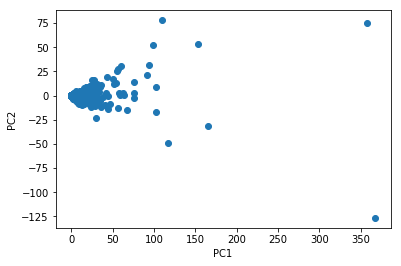

In [46]:
M = len(Y)
print(M)
P1 = np.zeros(M)
P2 = np.zeros(M)
for i in range(M):
        P1[i] = Y[i,0]
        P2[i] = Y[i,1]
plt.scatter(P1,P2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

array([[253.4016849 ,  21.15279694,  40.57895796, ...,  21.15279694,
         21.15279694,  21.15279694],
       [402.8508776 ,  21.15279694,  49.23516006, ...,  21.15279694,
         21.15279694,  21.15279694],
       [230.9574627 ,  21.15279694,  59.47200461, ...,  21.15279694,
         21.15279694,  21.15279694],
       ...,
       [347.8025093 ,  21.15279694,  32.32459562, ...,  21.15279694,
         21.15279694,  21.15279694],
       [411.2272612 ,  21.15279694,  41.426033  , ...,  21.15279694,
         21.15279694,  21.15279694],
       [283.7096943 ,  21.15279694,  32.754971  , ...,  21.15279694,
         21.15279694,  21.15279694]])

AttributeError: module 'pandas' has no attribute 'Y'